In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Output_rep1.GATA1.unstranded.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Loc", "Depth")
dat1 = read_tsv(fpath, col_names = cnames)
head(dat1)

Rows: 2000350 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (2): Loc, Depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Loc,Depth
<chr>,<dbl>,<dbl>
chrX,47786400,0
chrX,47786401,0
chrX,47786402,0
chrX,47786403,0
chrX,47786404,0
chrX,47786405,0


In [9]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "scratch", "coverage")
fname = "C.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Depth")
dat2 = read_tsv(fpath, col_names = cnames)
dat2 = dat2 %>% mutate(Depth = as.integer(Depth)) %>% mutate(Depth = coalesce(Depth, 0))
head(dat2)

Rows: 2000351 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Depth
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Chrom,Start,End,Depth
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,47786401,0
chrX,47786401,47786402,0
chrX,47786402,47786403,0
chrX,47786403,47786404,0
chrX,47786404,47786405,0
chrX,47786405,47786406,0


In [12]:
tail(dat1)

Chrom,Loc,Depth
<chr>,<dbl>,<dbl>
chrX,49786744,0
chrX,49786745,0
chrX,49786746,0
chrX,49786747,0
chrX,49786748,0
chrX,49786749,0


In [13]:
tail(dat2)

Chrom,Start,End,Depth
<chr>,<dbl>,<dbl>,<dbl>
chrX,49786745,49786746,0
chrX,49786746,49786747,0
chrX,49786747,49786748,0
chrX,49786748,49786749,0
chrX,49786749,49786750,0
chrX,49786750,49786751,0


In [10]:
print(length(dat1$Depth))
print(range(dat1$Depth))

[1] 2000350
[1]     0 11348


In [11]:
print(length(dat2$Depth))
print(range(dat2$Depth))

[1] 2000351
[1]     0 11348


In [15]:
all(dat1$Depth[1:2000350] == dat2$Depth[1:2000350])

[1] TRUE

In [18]:
start  = 48780000
end    = 48826000

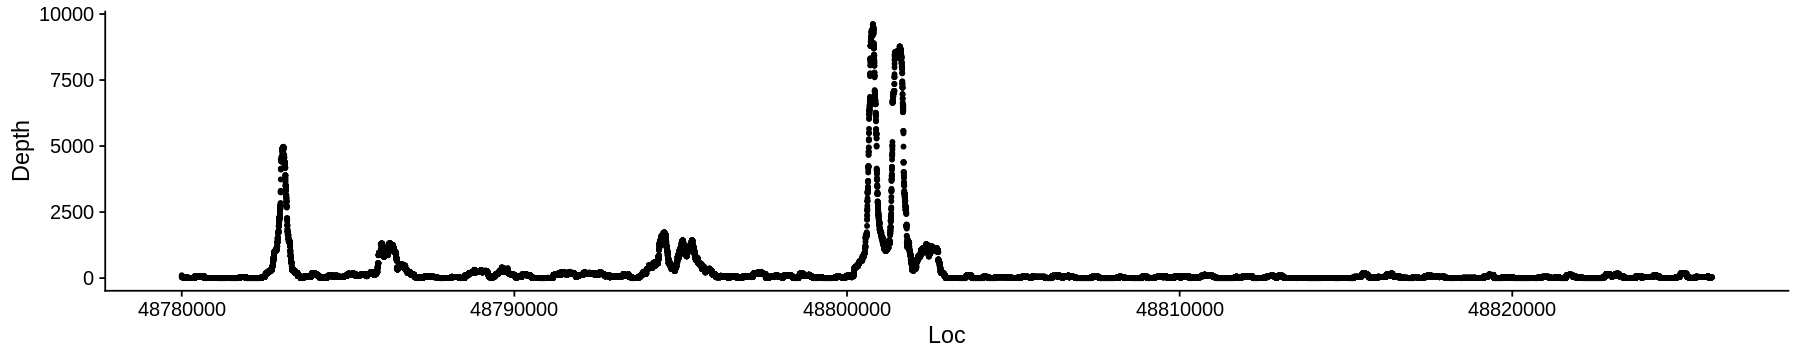

In [19]:
dat = dat1
dat = dat %>% dplyr::filter(Loc >= start, Loc <=end)
gpt = ggplot(dat, aes(x=Loc, y=Depth)) + geom_point(size=1) + theme_cowplot()

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

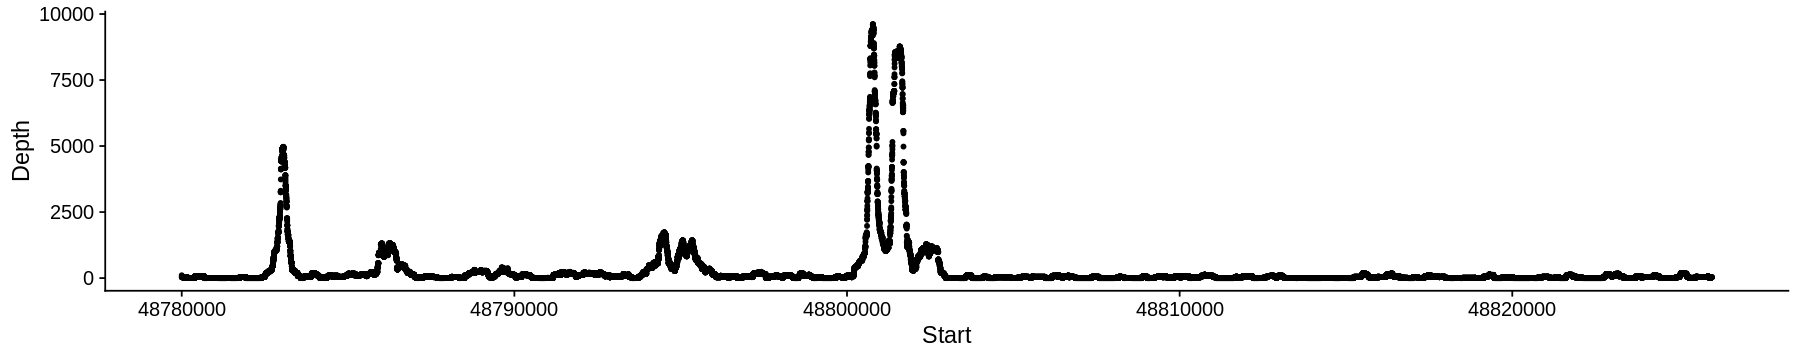

In [22]:
dat = dat2
dat = dat %>% dplyr::filter(Start >= start, Start <=end)
gpt = ggplot(dat, aes(x=Start, y=Depth)) + geom_point(size=1) + theme_cowplot()

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)